# Compile results

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scripts.io import read_image
from scripts.utils import c2ap

In [ ]:
baseline_directory = '../methods/'
METHOD_LIST = os.listdir(baseline_directory)
METHOD_LIST = [m for m in METHOD_LIST if not m.startswith('__') and len(os.listdir(os.path.join(baseline_directory, m, 'results'))) > 0]

METHOD_LIST

['gbf',
 'aef',
 'bm3d',
 'ppb',
 'tbog',
 'fans',
 'sar2sar',
 'merlin',
 'sarbm3d',
 'gnlm']

In [3]:
results_dict = {}

for m in METHOD_LIST:
    filenames = os.listdir(os.path.join(baseline_directory, m, 'results'))
    result_path = [os.path.join(baseline_directory, m, 'results', f) for f in filenames if f.endswith('.mat')][0]

    # filtered_data = scipy.io.loadmat(result_path)
    # filtered_data = filtered_data[KEY]
    filtered_data = read_image(result_path, 'sar_despeckled')
    filtered_data, _ = c2ap(filtered_data)

    results_dict[m] = filtered_data

results_dict.keys()

dict_keys(['gbf', 'aef', 'bm3d', 'ppb', 'tbog', 'fans', 'sar2sar', 'merlin', 'sarbm3d', 'gnlm'])

In [ ]:
input_path = "../../dataset/data_village.npz"

raw_data = read_image(input_path, 'sar')
raw_data, _ = c2ap(raw_data)

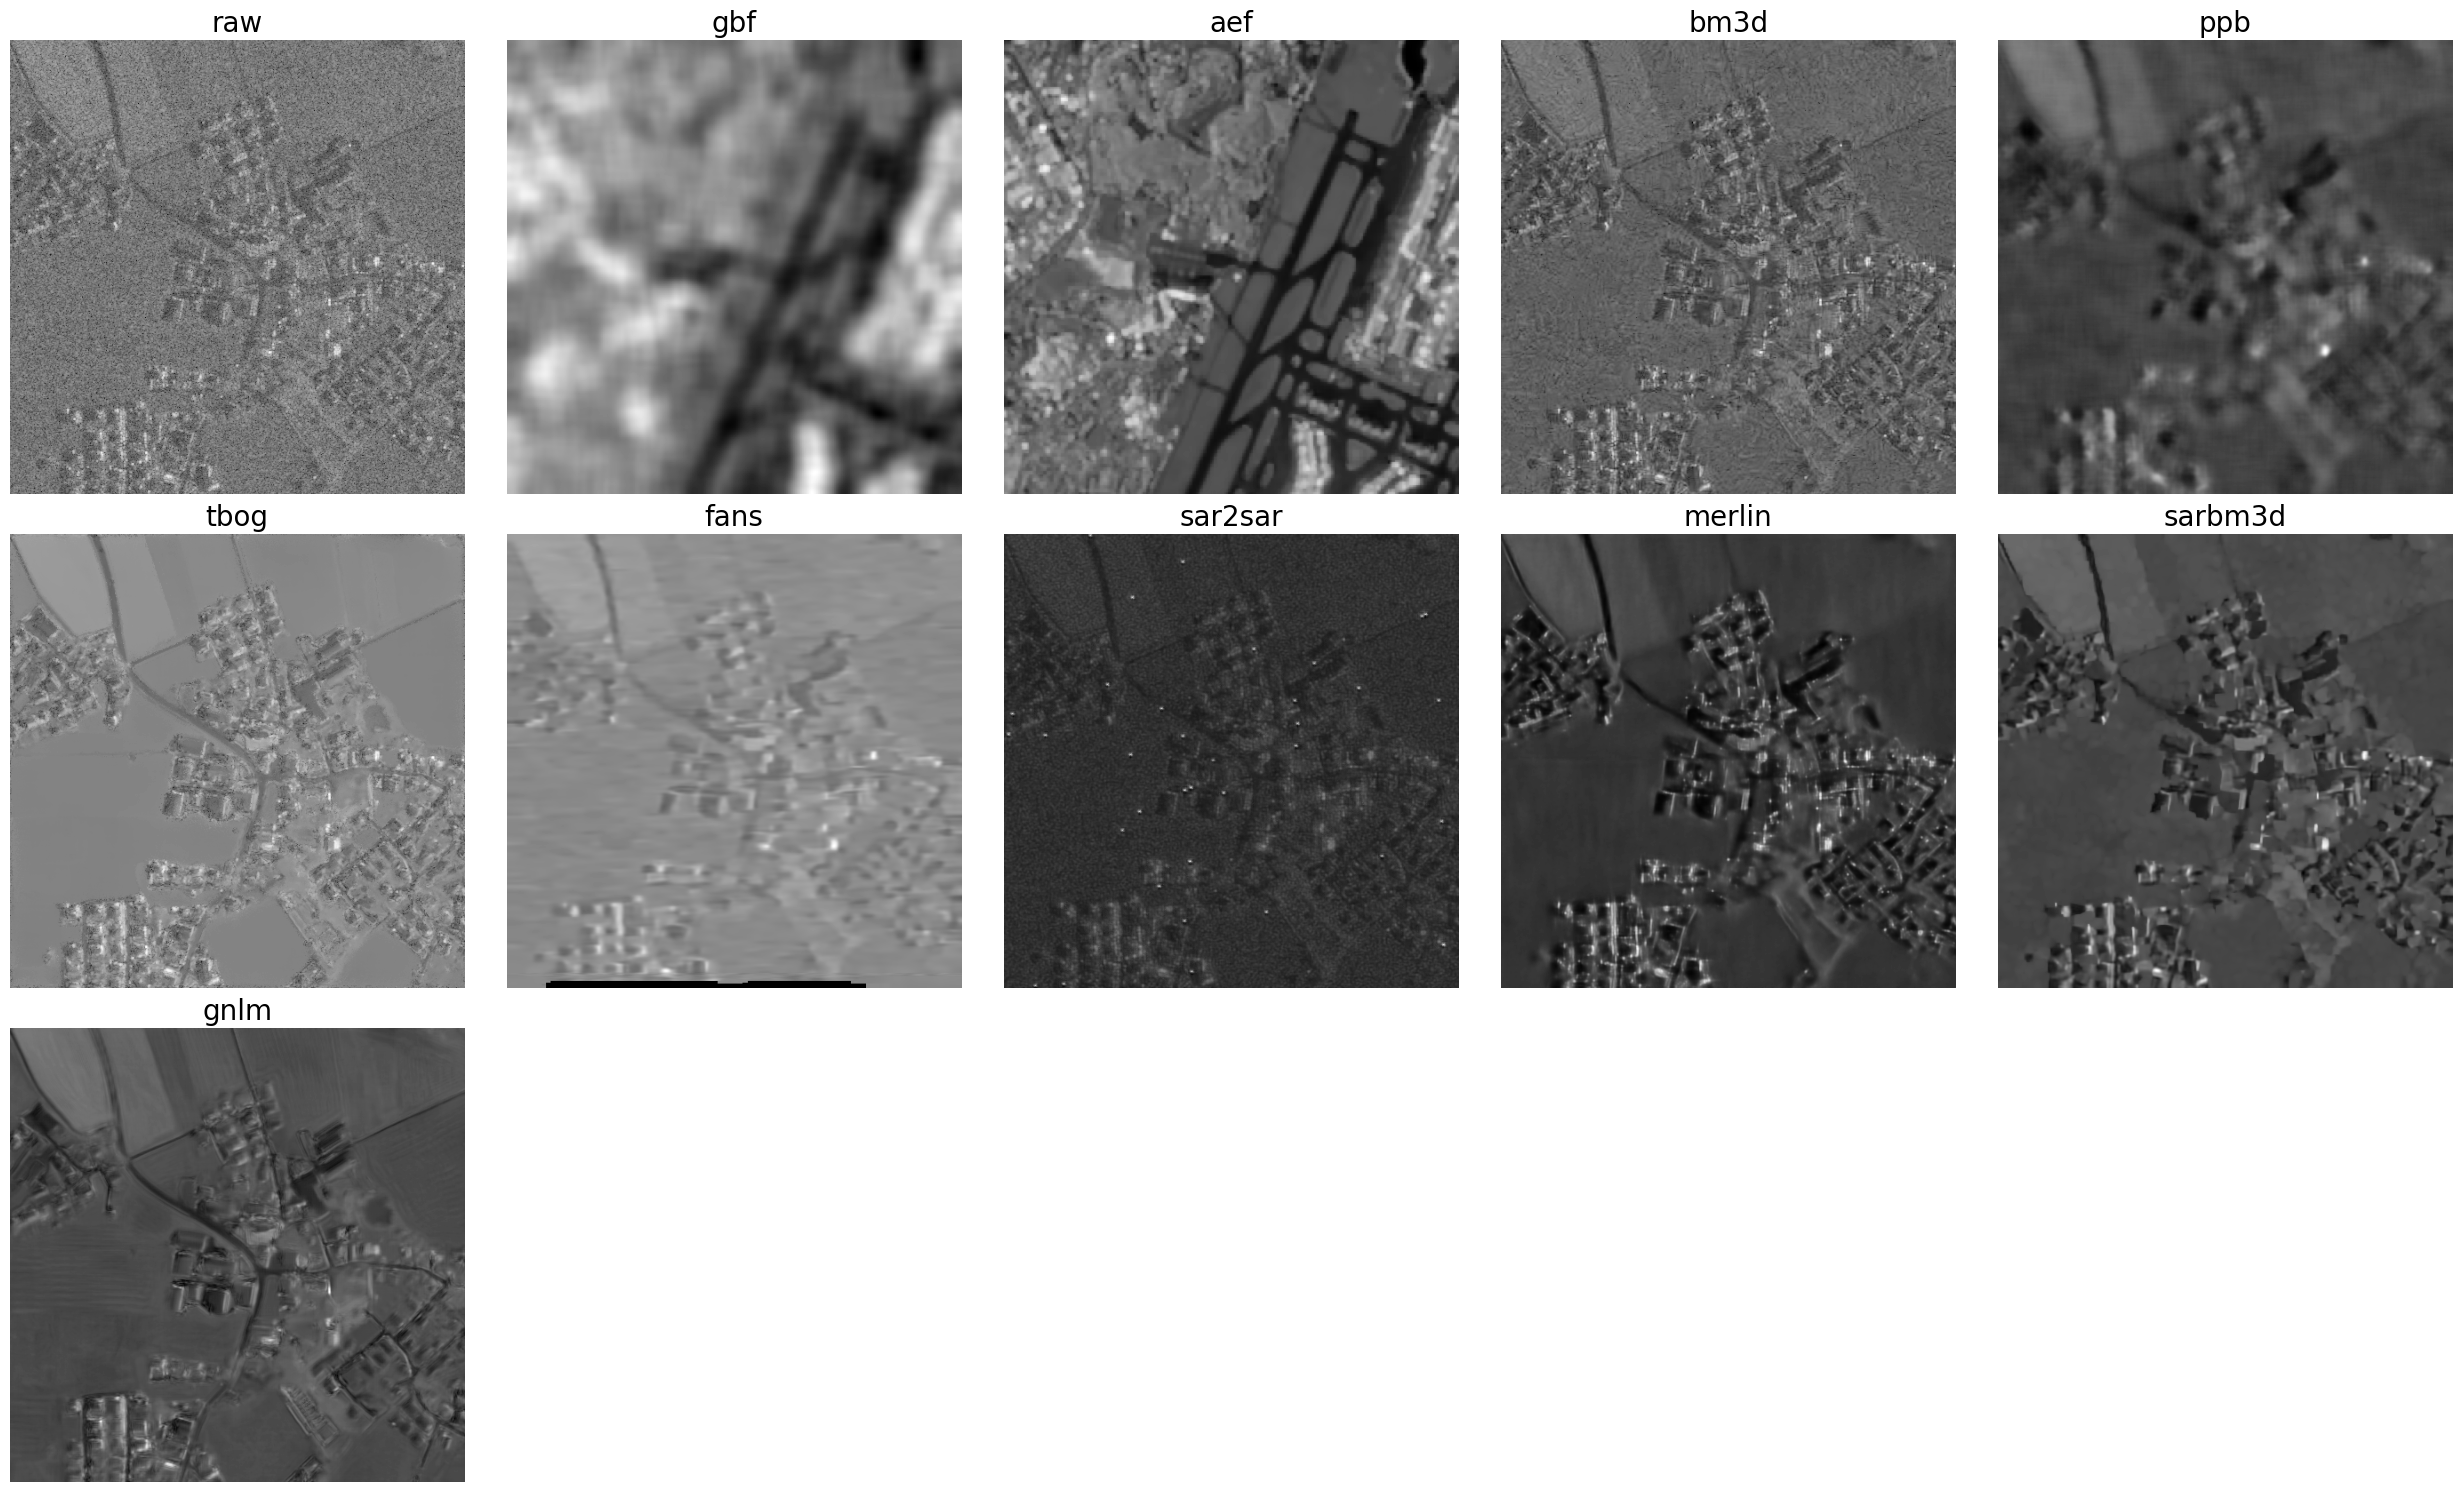

In [8]:
IMAGE_SIZE = 5
N_COLS = 5
FONTSIZE = 20

N_IMAGES = len(METHOD_LIST)
N_ROWS = int(np.ceil(N_IMAGES / N_COLS)) + 1

plt.figure(figsize=(IMAGE_SIZE * N_COLS, IMAGE_SIZE * N_ROWS))

plt.subplot(N_ROWS, N_COLS, 1)
plt.imshow(raw_data, cmap='gray')
plt.title('raw', fontsize=FONTSIZE)
plt.axis('off')

for i, METHOD in enumerate(METHOD_LIST):
    filtered_data = results_dict[METHOD]

    plt.subplot(N_ROWS, N_COLS, i + 2)
    plt.imshow(filtered_data, cmap='gray')
    plt.title(f'{METHOD}', fontsize=FONTSIZE)
    plt.axis('off')

plt.tight_layout()